# Serverless HDF Database

No classic server client-client concept is used. Instead a HDF file is created with external links to root groups of HDF files that included to the database.

In [1]:
from h5rdmtoolbox import h5database as h5db
from h5rdmtoolbox import generate_temporary_directory
from h5rdmtoolbox import tutorial

In [2]:
tocdir = generate_temporary_directory('test_repo')
tutorial.Database.build_test_repo(tocdir)

## H5Repo - External link based reository

Initialize a `H5Repo` object and specify the root directory under which HDF files are placed:

In [3]:
repo = h5db.H5repo(tocdir)

The object creates a `toc` file (toc=table of content) which is a HDF5 file with external links to the found HDF files:

In [4]:
repo.toc_filename.name

'test_repo0_toc.hdf'

The content can be dumped to the screen as a (pandas-) table:

In [5]:
repo.dump(full_path=False)  # minimizes the output (no full folder path is shown)

File name Folder path
0   repofile_00002.hdf        d111
1   repofile_00007.hdf        d111
2   repofile_00011.hdf        d111
3   repofile_00022.hdf        d111
4   repofile_00023.hdf        d111
..                 ...         ...
95  repofile_00057.hdf          d3
96  repofile_00062.hdf          d3
97  repofile_00072.hdf          d3
98  repofile_00085.hdf          d3
99  repofile_00095.hdf          d3

[100 rows x 2 columns]

The entries can be indexed and the file content is shown:

In [6]:
repo[0]

### Filtering

The repository can be filtered in a HDF5-like syntax. First import all filter classes from the module `filter_classes`:

In [7]:
from h5rdmtoolbox.h5database.filter_classes import *
# repo.list_attribute_values('operator', '/')

The filter method requires an object `Entry`. It is the access location within a file, here the group "operation_point" in the root group. In the example the repository is filtered for the attribute "long_name" equal to "Operation point data group". A sub-repository is returend which is again an HDF5 file with external links - but this time only to the HDF files matching the filter request:

In [8]:
%%time
sub_repo = repo.filter(Entry['/operation_point'].attrs['long_name'] == 'Operation point data group')

CPU times: total: 156 ms
Wall time: 145 ms


In [9]:
sub_repo.dump(False)

File name Folder path
0   repofile_00022.hdf        d111
1   repofile_00023.hdf        d111
2   repofile_00027.hdf        d111
3   repofile_00034.hdf        d111
4   repofile_00035.hdf        d111
5   repofile_00045.hdf        d111
6   repofile_00047.hdf        d111
7   repofile_00060.hdf        d111
8   repofile_00069.hdf        d111
9   repofile_00080.hdf        d111
10  repofile_00097.hdf        d111
11  repofile_00001.hdf         d11
12  repofile_00003.hdf         d11
13  repofile_00005.hdf         d11
14  repofile_00044.hdf         d11
15  repofile_00058.hdf         d11
16  repofile_00078.hdf         d11
17  repofile_00000.hdf          d1
18  repofile_00004.hdf          d1
19  repofile_00009.hdf          d1
20  repofile_00010.hdf          d1
21  repofile_00021.hdf          d1
22  repofile_00030.hdf          d1
23  repofile_00036.hdf          d1
24  repofile_00037.hdf          d1
25  repofile_00048.hdf          d1
26  repofile_00052.hdf          d1
27  repofile_00066.hdf          d1
28  repofile_00067.hdf          d1
29  repofile_00077.hdf          d1
30  repofile_00082.hdf          d1
31  repofile_00083.hdf          d1
32  repofile_00014.hdf         d21
33  repofile_00016.hdf         d21
34  repofile_00020.hdf         d21
35  repofile_00026.hdf         d21
36  repofile_00028.hdf         d21
37  repofile_00053.hdf         d21
38  repofile_00070.hdf         d21
39  repofile_00076.hdf         d21
40  repofile_00079.hdf         d21
41  repofile_00089.hdf         d21
42  repofile_00099.hdf         d21
43  repofile_00015.hdf          d2
44  repofile_00019.hdf          d2
45  repofile_00029.hdf          d2
46  repofile_00039.hdf          d2
47  repofile_00049.hdf          d2
48  repofile_00055.hdf          d2
49  repofile_00061.hdf          d2
50  repofile_00086.hdf          d2
51  repofile_00091.hdf          d2
52  repofile_00012.hdf          d3
53  repofile_00017.hdf          d3
54  repofile_00040.hdf          d3
55  repofile_00056.hdf          d3
56  repofile_00062.hdf          d3
57  repofile_00072.hdf          d3
58  repofile_00085.hdf          d3

The elsaped time for the filter request and building the new HDF toc-file is:

In [10]:
sub_repo.elapsed_time  # [s]

0.12194709999999986

Evaluating the sub-repository is quite straight forward as we are still working with HDF5 files. Let's plot data from the filter results:

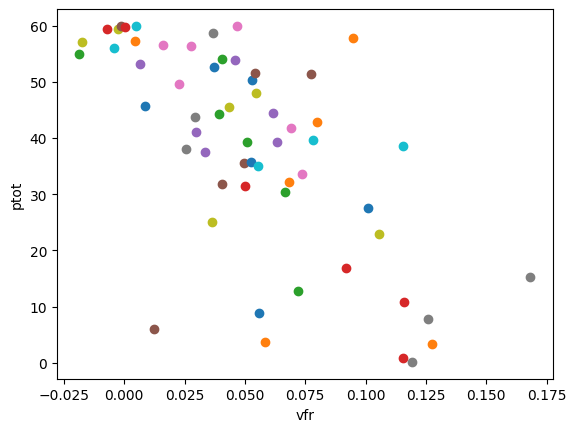

CPU times: total: 1.11 s
Wall time: 1.17 s


In [11]:
%%time
import matplotlib.pyplot as plt

plt.figure()
for r in sub_repo:
    with r as h5:
        if 'operation_point' in h5:
            plt.scatter(h5['operation_point']['vfr'].attrs['mean'], h5['operation_point']['ptot'].attrs['mean'])
plt.xlabel('vfr')
plt.ylabel('ptot')
plt.show()

## H5Files - Accessing multiple HDF files

This concepts assumes that we already know the HDF files. This might be a result from above

In [12]:
from h5rdmtoolbox.h5database import H5Files

In [13]:
sub_repo[0:3]

In [14]:
with H5Files(*[sr.filename for sr in sub_repo[0:4]]) as h5files:
    print(h5files.keys())
    h5files[list(h5files.keys())[0]].dump()

dict_keys(['repofile_00022', 'repofile_00023', 'repofile_00027', 'repofile_00034'])
